# Text Classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [2]:
filename = './data/amazon.txt'

lines = [line.rstrip('\n') for line in open(filename)]

X,Y=[],[]
for line in lines:
    sentence = line.split("#")
    X.append(sentence[0])
    Y.append(sentence[1])

In [3]:
x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.25)

In [4]:
x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0]

(750, 250, 750, 250)

In [5]:
vect = CountVectorizer()
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [6]:
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)
y_pred = nb.predict(x_test_dtm)

In [7]:
accuracy = ((y_test == y_pred).sum())*100/x_test.shape[0]
print("Accuracy of the model is: %d%% "%(accuracy))

Accuracy of the model is: 85% 


Text(91.68,0.5,'Predicted Labels')

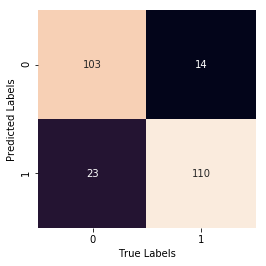

In [8]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

In [9]:
fpr, tpr, thresholds = roc_curve(np.array(y_test, dtype='int32'),np.array(y_pred, dtype='int32'))

In [10]:
auc(fpr,tpr)

0.852278545826933